<a href="https://colab.research.google.com/github/sahelsepehri/Bioinformatics-beginner/blob/main/DNA_Analyzer_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DNA Sequence :ATGGCTGCTGCCGACGACGCTGCCGACGCTGCCGACGACGCTGCCGACGCTGCCGACGAC
DNA Analysis Summary
             Property                                              Value
0        DNA Sequence  ATGGCTGCTGCCGACGACGCTGCCGACGCTGCCGACGACGCTGCCG...
1  Reverse Complement  GTCGTCGGCAGCGTCGGCAGCGTCGTCGGCAGCGTCGGCAGCGTCG...
2        RNA Sequence  AUGGCUGCUGCCGACGACGCUGCCGACGCUGCCGACGACGCUGCCG...
3    Protein Sequence                               MAAADDAADAADDAADAADD
4      GC Content (%)                                              73.33
5              Length                                                 60


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

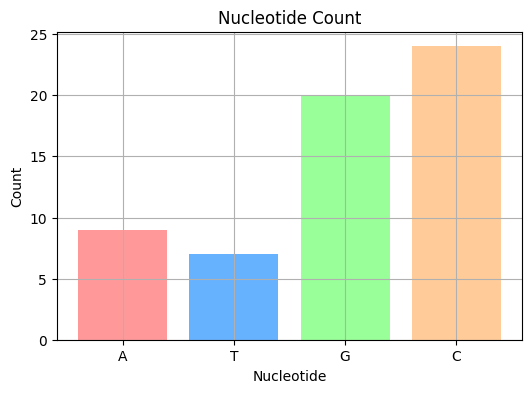

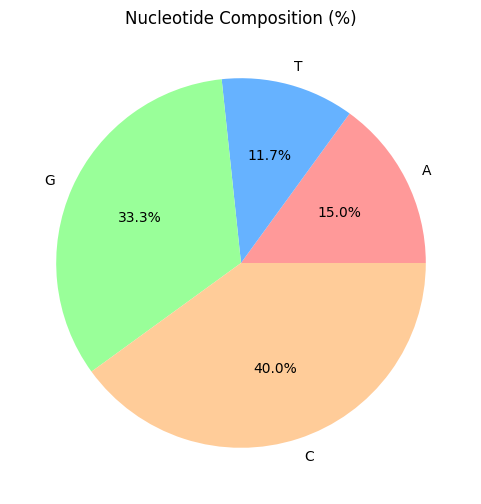

In [12]:

!pip install biopython

# Import libraries
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt

# ENter DNA sequence  for example dna_seq = "ATGGCTGCTGCCGACGACGCTGCCGACGCTGCCGACGACGCTGCCGACGCTGCCGACGAC"
dna_seq = input ( "DNA Sequence :")
dna_seq = dna_seq.upper()

# Create a Seq object
seq = Seq(dna_seq)

# Nucleotide Counts
A_count = seq.count("A")
T_count = seq.count("T")
G_count = seq.count("G")
C_count = seq.count("C")

# Total length of sequence
total_length = len(seq)

# Calculate percentages
data = {
    "Nucleotide": ["A", "T", "G", "C"],
    "Count": [A_count, T_count, G_count, C_count],
    "Percentage": [
        round((A_count / total_length) * 100, 2),
        round((T_count / total_length) * 100, 2),
        round((G_count / total_length) * 100, 2),
        round((C_count / total_length) * 100, 2),
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# GC Content
gc_content = round(100 * (G_count + C_count) / total_length, 2)

# Reverse Complement
reverse_complement = seq.reverse_complement()

# Trim DNA to multiple of 3 before translation
trimmed_seq = seq[:len(seq) - len(seq) % 3]

# Transcribe to RNA
rna_seq = trimmed_seq.transcribe()

# Translate to Protein
protein_seq = rna_seq.translate()


# Prepare a summary table
summary = {
    "Property": [
        "DNA Sequence",
        "Reverse Complement",
        "RNA Sequence",
        "Protein Sequence",
        "GC Content (%)",
        "Length"
    ],
    "Value": [
        str(seq),
        str(reverse_complement),
        str(rna_seq),
        str(protein_seq),
        gc_content,
        total_length
    ]
}
summary_df = pd.DataFrame(summary)

# Show summary table
print("DNA Analysis Summary")
print(summary_df)

# Save summary to CSV
summary_df.to_csv("dna_analysis_summary.csv", index=False)

# Download CSV in Colab
from google.colab import files
files.download("dna_analysis_summary.csv")

# Plot nucleotide count (bar chart)
plt.figure(figsize=(6, 4))
plt.bar(df["Nucleotide"], df["Count"], color=["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"])
plt.title("Nucleotide Count")
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Plot nucleotide percentage (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(df["Percentage"], labels=df["Nucleotide"], autopct="%1.1f%%", colors=["#FF9999", "#66B2FF", "#99FF99", "#FFCC99"])
plt.title("Nucleotide Composition (%)")
plt.show()
